# Question 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_avg(avgs):
  length = len(avgs)
  plt.figure(figsize=(15,5))
  types = ['A', 'B', 'C', 'D']
  k = 1
  for avg in avgs:
    plt.subplot(1, length, k )
    plt.plot(avg, '-')
    plt.xlim([-20, 201])
    plt.ylim([-1.2, 2.2])
    plt.xlabel('time')
    plt.ylabel('avrages')
    plt.grid(True)  
    plt.title(f'averages per time in {types[k-1]}')
    plt.legend(types[k-1])
    k+=1
  plt.show()

 ## a

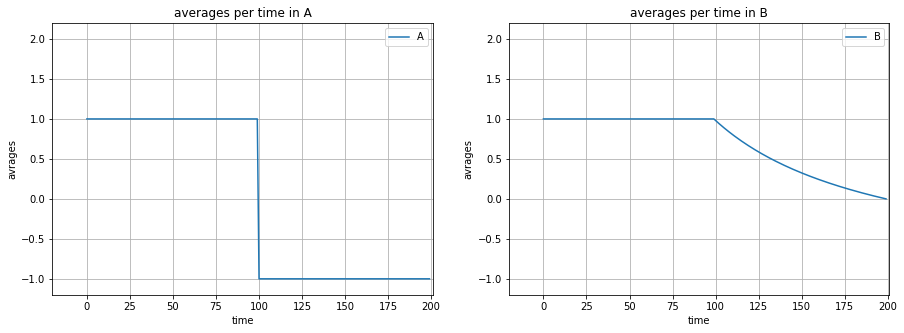

In [ ]:
d = np.concatenate((np.ones(100), -1 * np.ones(100)))
t = np.arange(1,201)
avg_a = np.cumsum(d) / t
plot_avg(avgs=[d, avg_a])

## b

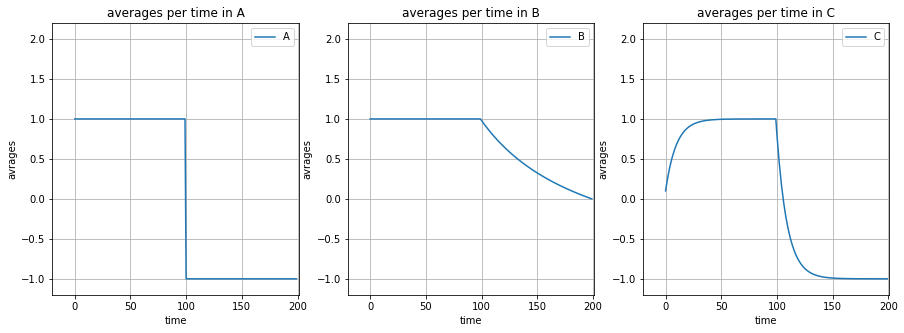

In [ ]:
beta = 0.9
avg_b = [(1 - beta) * 1]
for i in range(1, 200):
  avg_b.append(avg_b[i-1] * beta + d[i]*(1-beta))
plot_avg(avgs=[d, avg_a, avg_b])

## c

[0.99999986 0.99999988 0.99999989 0.9999999  0.99999991 0.99999992
 0.99999993 0.99999993 0.99999994 0.99999995 0.99999995 0.99999996
 0.99999996 0.99999997 0.99999997 0.99999997 0.99999997 0.99999998
 0.99999998 0.99999998 0.99999998 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
[1.         0.1        0.19       0.271      0.3439     0.40951
 0.468559   0.5217031  0.56953279 0.61257951 0.65132156 0.6861894
 0.71757046 0.74581342 0.77123208 0.79410887 0.81469798 0.83322818
 0.84990536 0.86491483]
7.055079108655367e-10


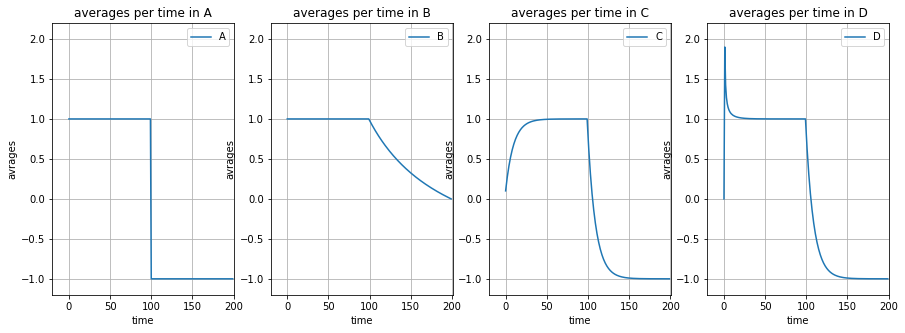

In [ ]:
times = np.array([(1 - beta**t) for t in range(0,200)])
times[0] = 1
print(times[-50:])
print(times[:20])
print(0.9**200)
avg_c = avg_b / times
avg_c[0] = 0
plot_avg(avgs=[d, avg_a, avg_b, avg_c])


## d

first 20 : [1.         0.1        0.19       0.271      0.3439     0.40951
 0.468559   0.5217031  0.56953279 0.61257951 0.65132156 0.6861894
 0.71757046 0.74581342 0.77123208 0.79410887 0.81469798 0.83322818
 0.84990536 0.86491483]
last 20 : [0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


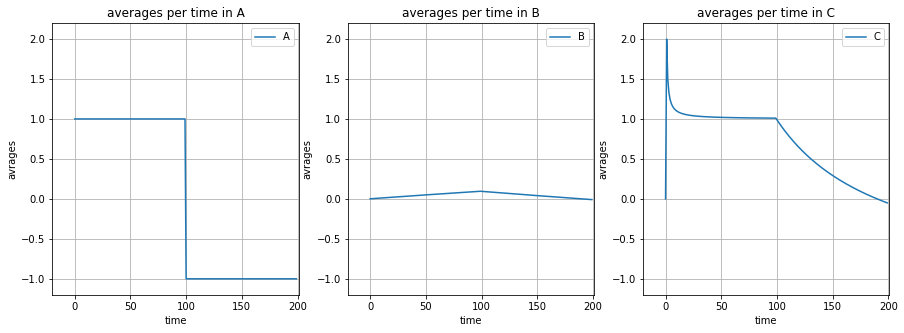

In [ ]:
beta_b = 0.999
avg_b_d = [(1-beta_b) * 1]
for i in range(1, 200):
  avg_b_d.append(avg_b_d[i-1] * beta_b + d[i]*(1-beta_b))
print(f'first 20 : {times[:20]}')
print(f'last 20 : {times[180:]}')
times = np.array([(1 - beta_b**t) for t in range(0, 200)]) 
times[0] = 1
avg_c_d = np.array(avg_b_d) / times
avg_c_d[0] = 0
plot_avg(avgs=[d, avg_b_d, avg_c_d])

# Question 3

In [24]:
# import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from keras.models import Sequential
from keras import layers
import random

### download the data

In [25]:
# download and load data

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

### preview data

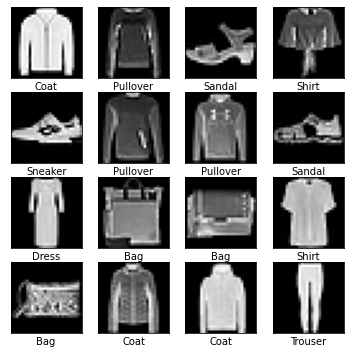

In [26]:
# preview of data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

CLASS_NUM = len(np.unique(y_train))
INPUT_SHAPE = x_train.shape[1:]

# draw the fashion pic
plt.figure(figsize=(6,6))
for i in range(16):
  plt.subplot(4,4, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[y_train[i + 399]])
  plt.imshow(x_train[i + 399], cmap=plt.cm.gray)
plt.show()


### normalize data

In [27]:
# normalize data & vizualize data
x_train = x_train / 255.0
x_test = x_test / 255.0

### hidden layer unit

In [28]:
# build model

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

lr = 0.001
optimizer = SGD(learning_rate=lr, momentum=0.9)
epochs = 50

def create_model(hidden_neuron):
  model = Sequential()
  model.add(layers.Flatten(input_shape = INPUT_SHAPE))
  model.add(layers.Dense(hidden_neuron, activation='relu'))
  model.add(layers.Dense(CLASS_NUM, activation='sigmoid'))
  model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy',])
  return model

hidden_layer_neurons = [16, 32, 64, 128]

def train_model(validation_split_rate=0.3):
  # contain tuple of (history, model, neurons_num)
  history_model = []

  for n in hidden_layer_neurons:
    model = create_model(n)
    history = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_split=validation_split_rate)
    history_model.append((history, model, n))
  return history_model

historys = train_model()

Epoch 1/50
329/329 [==============================] - 2s 4ms/step - loss: 1.5061 - accuracy: 0.5428 - val_loss: 1.0197 - val_accuracy: 0.6957
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.8720 - accuracy: 0.7273 - val_loss: 0.7707 - val_accuracy: 0.7494
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.7214 - accuracy: 0.7612 - val_loss: 0.6798 - val_accuracy: 0.7679
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.6522 - accuracy: 0.7805 - val_loss: 0.6307 - val_accuracy: 0.7832
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.6102 - accuracy: 0.7949 - val_loss: 0.5961 - val_accuracy: 0.7957
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.5811 - accuracy: 0.8043 - val_loss: 0.5727 - val_accuracy: 0.8053
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.5588 - accuracy: 0.8125 - val_loss: 0.5535 - val_accuracy: 0.8107
Epoch 

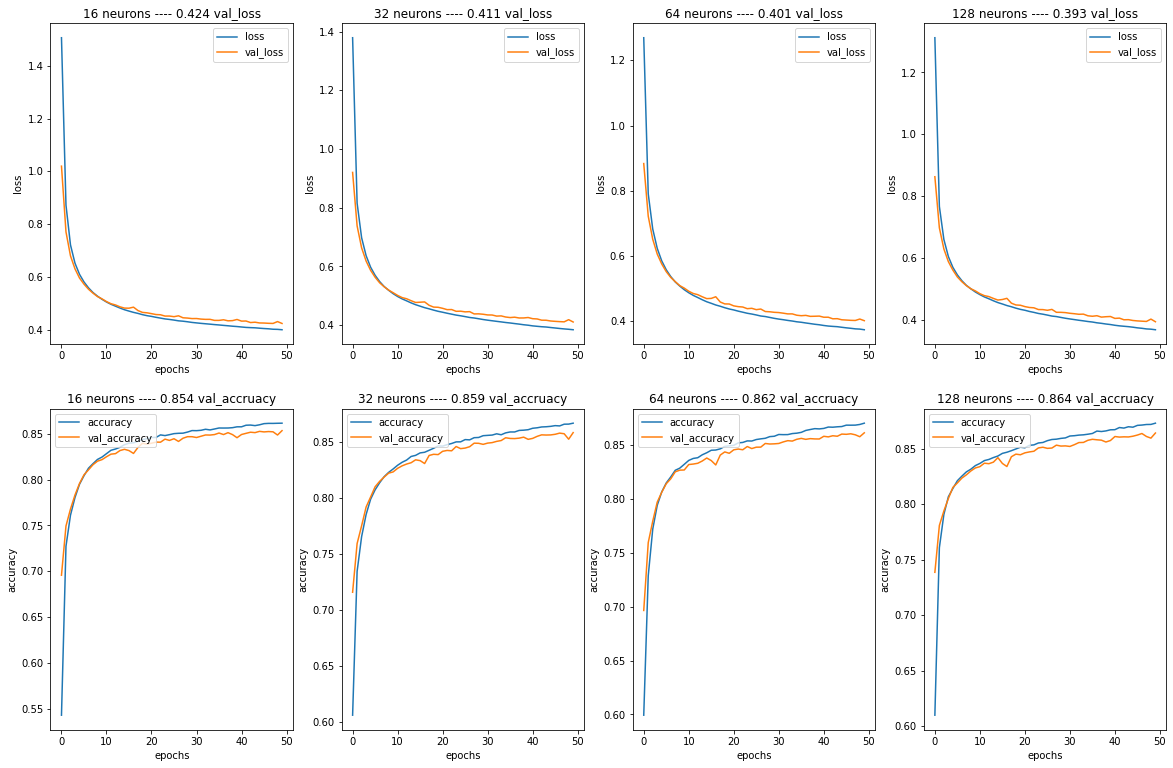

In [29]:
plt.figure(figsize=(20,13))
for i in range(len(historys)):
  plt.subplot(2, 4, i + 1)
  history, model , neuron_num = historys[i]
  """ loss """
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend(['loss', 'val_loss'], loc='upper right')
  plt.title(f'{neuron_num} neurons ---- {np.round(history.history["val_loss"][epochs - 1],3)} val_loss')
  """ accuracy """
  plt.subplot(2, 4, i + 5)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
  plt.title(f'{neuron_num} neurons ---- {np.round(history.history["val_accuracy"][epochs - 1],3)} val_accruacy')

plt.show()

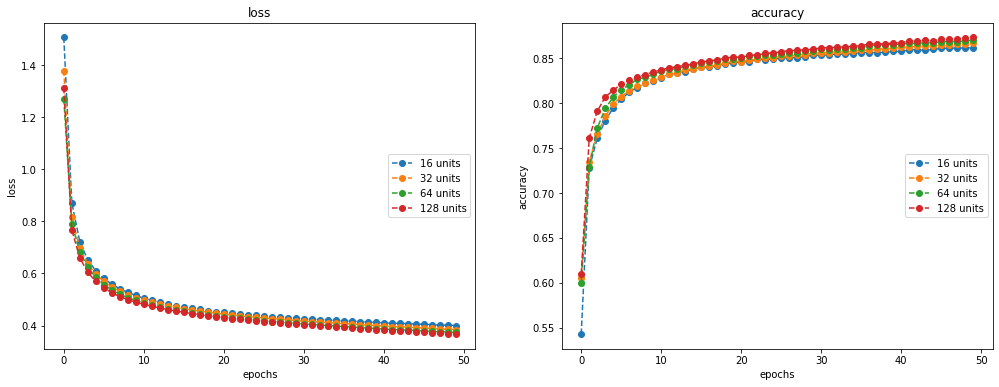

In [30]:
# draw loss of different hidden units in one graph

def plot_history(his, types):
  plt.figure(figsize=(17,6))
  graphs = ['loss', 'accuracy']
  for i in range(len(graphs)):
    plt.subplot(1,2,i + 1)
    for h in his:
      plt.plot(h.history[graphs[i]], 'o--')
    plt.xlabel('epochs')
    plt.ylabel(graphs[i])
    plt.legend(types , loc='center right')
    plt.title(graphs[i])
  plt.show()

tmp = [val[0] for val in historys]
model_types = ['16 units', '32 units', '64 units', '128 units']

plot_history(his=tmp,types=model_types)

In [31]:
# test accuracy per each model

for val in historys:
  history, model, neurons = val
  print(model.summary())
  print(f'Accuracy of train data is : {history.history["accuracy"][-1:][0]}')
  print(f'Accuracy of test data is {model.evaluate(x_test, y_test, verbose=0)[1]}')
  print('**'*100)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
None
Accuracy of train data is : 0.8616428375244141
Accuracy of test data is 0.8434000015258789
********************************************************************************************************************************************************************************************************
Model: "sequential_15"
___________________________________________________________

### different vlidation split


for validation rate = 0.15 : 
Accuracy of train data is : 0.8785882592201233
Accuracy of test data is 0.8593999743461609
********************************************************************************************************************************************************************************************************
for validation rate = 0.3 : 
Accuracy of train data is : 0.8740000128746033
Accuracy of test data is 0.8536999821662903
********************************************************************************************************************************************************************************************************
for validation rate = 0.45 : 
Accuracy of train data is : 0.8688181638717651
Accuracy of test data is 0.8495000004768372
********************************************************************************************************************************************************************************************************


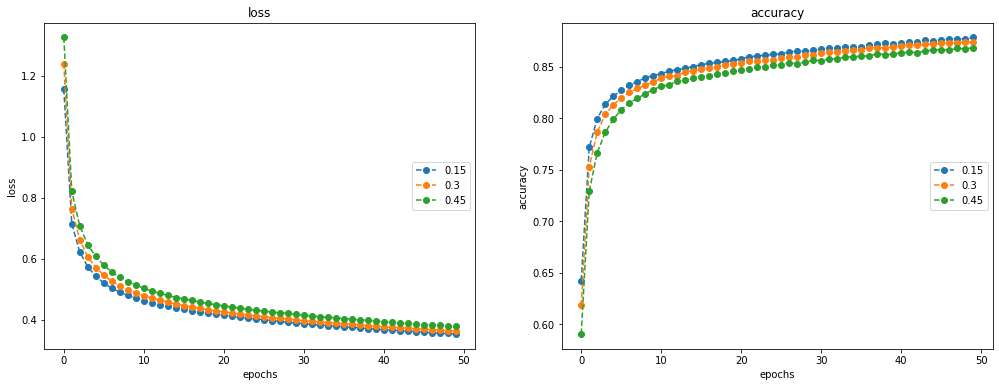

In [32]:
# change the validatio split

validation_split = [0.15, 0.3, 0.45]
best_hidden_neuron_number = 128

historys_validation = []
for rate in validation_split:
  model = create_model(best_hidden_neuron_number)
  h = model.fit(x_train, y_train, batch_size=128, epochs=epochs, validation_split=rate, verbose=0)
  print(f'for validation rate = {rate} : ')
  print(f'Accuracy of train data is : {h.history["accuracy"][-1:][0]}')
  print(f'Accuracy of test data is {model.evaluate(x_test, y_test, verbose=0)[1]}')
  print('**'*100)
  historys_validation.append(h)

plot_history(his=historys_validation, types=validation_split)




### chose best optimizer

In [33]:
# chose the best optimizer
best_hidden_neuron = 128
best_validation_split_rate = 0.15

adam = Adam(learning_rate=lr)
rmsprop = RMSprop(learning_rate=lr)
adagrad = Adagrad(learning_rate=lr)
optimizers = [adam, rmsprop, adagrad]
optimizers_types = ['Adam', 'RMSprop', 'Adagrad']

def create_model_e(opt):
  model = Sequential()
  model.add(layers.Flatten(input_shape = INPUT_SHAPE))
  model.add(layers.Dense(best_hidden_neuron, activation='relu'))
  model.add(layers.Dense(CLASS_NUM, activation='sigmoid'))
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy',])
  return model

def train_evalute_e():
  history_arr = []
  for opt in zip(optimizers, optimizers_types):
    model = create_model_e(opt[0])
    his = model.fit(x_train,y_train, batch_size=128, epochs=epochs, validation_split=best_validation_split_rate, verbose=0)
    history_arr.append(his)
    print(f'For optimizer {opt[1]} :: ')
    print(f'Accuracy of TRAIN ===========> {his.history["accuracy"][-1:][0]}')
    print(f'Loss & Accuracy of TEST  ===========> {model.evaluate(x_test, y_test, verbose=0)}')
    print('*'*100)
  return history_arr
history_arr = train_evalute_e()

For optimizer Adam :: 
Accuracy of TRAIN ===========> 0.9607843160629272
Loss & Accuracy of TEST  ===========> [0.44158753752708435, 0.8831999897956848]
****************************************************************************************************
For optimizer RMSprop :: 
Accuracy of TRAIN ===========> 0.9591176509857178
Loss & Accuracy of TEST  ===========> [0.5303723216056824, 0.8741999864578247]
****************************************************************************************************
For optimizer Adagrad :: 
Accuracy of TRAIN ===========> 0.8416274785995483
Loss & Accuracy of TEST  ===========> [0.5052856206893921, 0.8267999887466431]
****************************************************************************************************


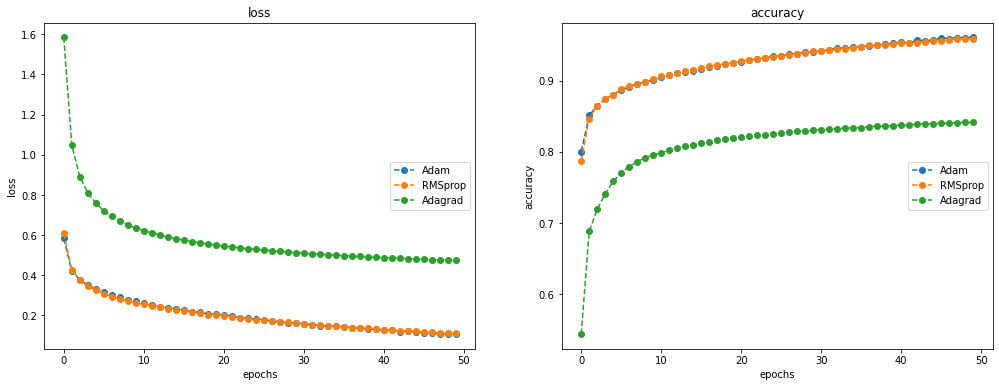

In [34]:
# draw loss and accuracy of different optimizers

plot_history(history_arr, optimizers_types)

### learning rate

In [35]:
# chose the best learning rate
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_optimizer = 'adam'

def create_model_f(rate):
  model = Sequential()
  model.add(layers.Flatten(input_shape = INPUT_SHAPE))
  model.add(layers.Dense(best_hidden_neuron, activation='relu'))
  model.add(layers.Dense(CLASS_NUM, activation='sigmoid'))
  model.compile(optimizer=Adam(learning_rate=rate), loss='sparse_categorical_crossentropy', metrics=['accuracy',])
  return model

def train_evalute_f():
  history_arr = []
  for r in learning_rates:
    model = create_model_f(r)
    his = model.fit(x_train,y_train, batch_size=128, epochs=epochs, validation_split=best_validation_split_rate, verbose=0)
    history_arr.append(his)
    print(f'For learning rate {r} :: ')
    print(f'Accuracy of TRAIN ===========> {his.history["accuracy"][-1:][0]}')
    print(f'Loss & Accuracy of TEST  ===========> {model.evaluate(x_test, y_test, verbose=0)}')
    print('*'*100)
  return history_arr

history_rates = train_evalute_f()


For learning rate 0.1 :: 
Accuracy of TRAIN ===========> 0.5996274352073669
Loss & Accuracy of TEST  ===========> [1.0595837831497192, 0.6079000234603882]
****************************************************************************************************
For learning rate 0.01 :: 
Accuracy of TRAIN ===========> 0.9198627471923828
Loss & Accuracy of TEST  ===========> [0.5526537299156189, 0.8664000034332275]
****************************************************************************************************
For learning rate 0.001 :: 
Accuracy of TRAIN ===========> 0.9613725543022156
Loss & Accuracy of TEST  ===========> [0.4285825788974762, 0.8841999769210815]
****************************************************************************************************
For learning rate 0.0001 :: 
Accuracy of TRAIN ===========> 0.9068039059638977
Loss & Accuracy of TEST  ===========> [0.3530060350894928, 0.8766999840736389]
***********************************************************************

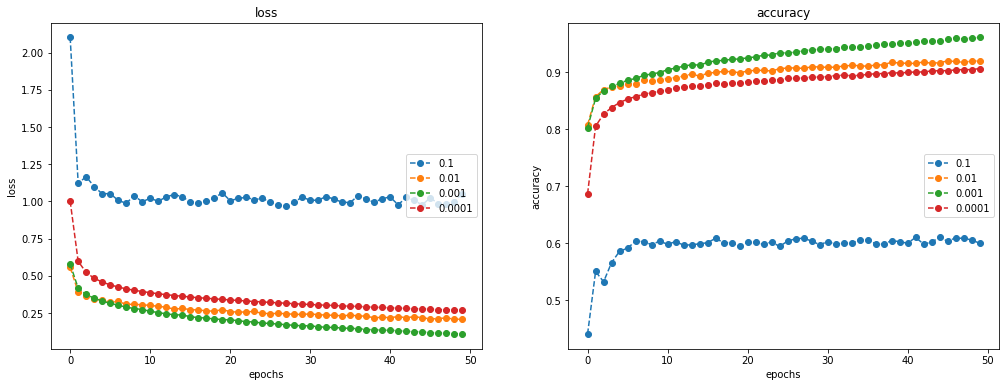

In [36]:
# drawing differents learning rates

plot_history(history_rates, learning_rates)


### decrease epochs

In [37]:
best_learning_rate = 0.001

Epochs = [50, 10]

history_epochs = []

for e in Epochs:
  ml = create_model_f(rate=best_learning_rate)
  h = ml.fit(x_train,y_train, batch_size=128, epochs=e, validation_split=best_validation_split_rate, verbose=0)
  history_epochs.append(h)
  print(f'For epoch {e} :: ')
  print(f'Accuracy of TRAIN ===========> {h.history["accuracy"][-1:][0]}')
  print(f'Loss & Accuracy of TEST  ===========> {ml.evaluate(x_test, y_test, verbose=0)}')
  print('*'*100)


For epoch 50 :: 
Accuracy of TRAIN ===========> 0.9589411616325378
Loss & Accuracy of TEST  ===========> [0.44364529848098755, 0.8812999725341797]
****************************************************************************************************
For epoch 10 :: 
Accuracy of TRAIN ===========> 0.901941180229187
Loss & Accuracy of TEST  ===========> [0.3405246138572693, 0.8763999938964844]
****************************************************************************************************


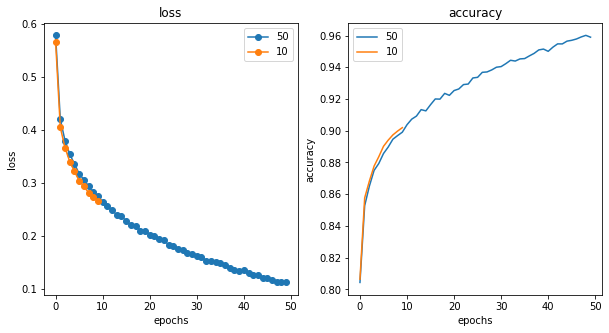

In [38]:
# loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history_epochs[0].history['loss'], '-o')
plt.plot(history_epochs[1].history['loss'], '-o')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(Epochs)

# accuracy
plt.subplot(1,2,2)
plt.plot(history_epochs[0].history['accuracy'])
plt.plot(history_epochs[1].history['accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(Epochs)

plt.show()
